# Data set Context

This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   This dataset is based on "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
   The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb.
   This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns). 
   Using the rminer package and R tool (http://cran.r-project.org/web/packages/rminer/), we found that the addition of the five new social and economic attributes (made available here) lead to substantial improvement in the prediction of a success, even when the duration of the call is not included. Note: the file can be read in R using: d=read.table("bank-additional-full.csv",header=TRUE,sep=";")
   
   The zip file includes two datasets: 
      1) bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank-additional.csv with 10% of the examples (4119), randomly selected from bank-additional-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g., SVM).

   The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

5. Number of Instances: 41188 for bank-additional-full.csv

6. Number of Attributes: 20 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2014].

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   # related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   # other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   # social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 


# Task  : 
In this project we investigate the relationship between severity of the accident and Mulitple Features. Also we predict the severity of the accident based on mulitple features.

# Imorting All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import r2_score
from sklearn import metrics

**Importing Data Set** : 
Importing dataset from downloaded file on System using Pandas package

In [2]:
original_data = pd .read_csv( "C:\\Users\\SS\\Downloads\\MDS Course files\\Projects\\Data Sets\\bank-additional Class\\bank-additional-full.csv" ,sep=';')

In [3]:
original_data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In this Dataset y/target feature says **"Client Subscribed a Term Deposit or not"**

This Shows Data has 21 columns. But we dont know the no. of entries. So, We find **SHAPE** of the data

In [4]:
original_data .shape

(41188, 21)

This dataset has 41188 enteries/rows and 21 features/columns

### Info on features/columns of the Data set

In [5]:
original_data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

Result of this code shows 5 features are of float data type , 5 are of int data type and 11 are objects.

### Statistical Information of the Data set

In [6]:
original_data .describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

# Null Values
First we check null values in each features 

In [7]:
original_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

clearly this code shows there is no null values.
But as mentioned in Dataset Context, Null/misisng values are in categorical feature and names as unknown.

### We dont need the categorical features of this data as it mostly contain personal details.
So, we dont drop any row or enteries

# Correlation between continuous valued features

In [8]:
cont_features = original_data.select_dtypes(exclude=['object'])

In [9]:
cont_features .corr()

age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
campaign            0.150754        0.127836      -0.013733   0.135133   
pdays               0.271004        0.078889      -0.091342   0.296899   
previous           -0.420489       -0.203130      -0.050936  -0.454494   
emp.var.rate        1.000000        0.775334       0.196041   0.972245   
cons.price.idx      0.775334        1.000000       0.058986   0.688230   
cons.conf.idx       0.196041        0.058986       1.000000   0.277686   
euribor3m           0.972245        0.688230       0.277686   1.000000   
nr.employed         0.906970        0.522034       0.100513   0.945154   

                nr.employed  
age               -0.017725  
duration          -0.044703  
campaign           0.144095  
pdays              0.372605  
previous          -0.501333  
emp.var.rate       0.906970  
cons.price.idx     0.522034  
cons.conf.idx      0.100513  
euribor3m          0.945154  
nr.employed        1.000000

# Feature Selection
We only have 10 features with continous values. But we try to find some top features which affects the target feature.

In [10]:
# bool_features = data_wo_nan.select_dtypes(include='bool')
# bool_features.head()

**Note** : Features with boolean values actually have True and False.

So we change these values in numbers using label encoder.

In [11]:
# from sklearn import preprocessing
# bool_features = bool_features.apply( preprocessing.LabelEncoder().fit_transform )
# bool_features.head()

In [12]:
# obj_features = data_wo_nan.select_dtypes(include = 'object')
# obj_features.head(2)

Clearly by seprating data by dtype of features. we see severity of accident will depend on continuous features and boolean features.

Now we concat continuous and boolean features in features variable. Then we do Fature Selection on them.

In [13]:
all_req_features = pd.concat([cont_features,original_data['y']],axis=1)

In [14]:
all_req_features.shape

(41188, 11)

In [15]:
features = all_req_features.loc[: , all_req_features.columns != 'y']

In [16]:
target = all_req_features.loc[: , all_req_features.columns == 'y']

### For Feature Selection we use Annova function in SelectKBest 
First we import some function from modules of some packages

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 

In [18]:
bestfeatures = SelectKBest(score_func=f_classif,k=3)

In [19]:
fit = bestfeatures.fit(features,target)
feature_scores = pd.DataFrame(fit.scores_)
feature_scores.head()

C:\Users\SS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0
0    38.094659
1  8094.101634
2   182.156673
3  4861.173272
4  2304.257088

In [20]:
feature_column_name=pd.DataFrame(features.columns)

In [21]:
feature_score_df = pd.concat([feature_column_name,feature_scores],axis=1)
feature_score_df.columns=['Features','Score']
feature_score_df

Features        Score
0             age    38.094659
1        duration  8094.101634
2        campaign   182.156673
3           pdays  4861.173272
4        previous  2304.257088
5    emp.var.rate  4023.829925
6  cons.price.idx   778.589795
7   cons.conf.idx   124.409975
8       euribor3m  4309.479048
9     nr.employed  5926.610601

### Top 7 Features with best scores

In [22]:
print(feature_score_df.nlargest(7,'Score'))

         Features        Score
1        duration  8094.101634
9     nr.employed  5926.610601
3           pdays  4861.173272
8       euribor3m  4309.479048
5    emp.var.rate  4023.829925
4        previous  2304.257088
6  cons.price.idx   778.589795


# Model Dataset

In [23]:
model_data = all_req_features[['duration' , 'nr.employed' , 'pdays' , 'euribor3m' , 'emp.var.rate' ,
                               'previous' , 'cons.price.idx' , 'y']]
model_data .shape

(41188, 8)

In [24]:
model_data.describe()

duration   nr.employed         pdays     euribor3m  emp.var.rate  \
count  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000   
mean     258.285010   5167.035911    962.475454      3.621291      0.081886   
std      259.279249     72.251528    186.910907      1.734447      1.570960   
min        0.000000   4963.600000      0.000000      0.634000     -3.400000   
25%      102.000000   5099.100000    999.000000      1.344000     -1.800000   
50%      180.000000   5191.000000    999.000000      4.857000      1.100000   
75%      319.000000   5228.100000    999.000000      4.961000      1.400000   
max     4918.000000   5228.100000    999.000000      5.045000      1.400000   

           previous  cons.price.idx  
count  41188.000000    41188.000000  
mean       0.172963       93.575664  
std        0.494901        0.578840  
min        0.000000       92.201000  
25%        0.000000       93.075000  
50%        0.000000       93.749000  
75%        0.000000       93.994000  
max        7.000000       94.767000

# Extracting Dependent and Independent Feature from Data set

-> Dependent Feature/Variable, y = Client Subscribed a Term Deposit or not (y)

-> Independent Feature/Variable, x = Multiple Features

In [25]:
x = model_data[['duration' , 'nr.employed' , 'pdays' , 'euribor3m' , 'emp.var.rate' ,
                               'previous' , 'cons.price.idx' ]] .values
y = model_data['y'] .values

In [26]:
print( x[0:5] )
print( f"Shape of Independent(x) variable is { x.shape }" )

[[2.6100e+02 5.1910e+03 9.9900e+02 4.8570e+00 1.1000e+00 0.0000e+00
  9.3994e+01]
 [1.4900e+02 5.1910e+03 9.9900e+02 4.8570e+00 1.1000e+00 0.0000e+00
  9.3994e+01]
 [2.2600e+02 5.1910e+03 9.9900e+02 4.8570e+00 1.1000e+00 0.0000e+00
  9.3994e+01]
 [1.5100e+02 5.1910e+03 9.9900e+02 4.8570e+00 1.1000e+00 0.0000e+00
  9.3994e+01]
 [3.0700e+02 5.1910e+03 9.9900e+02 4.8570e+00 1.1000e+00 0.0000e+00
  9.3994e+01]]
Shape of Independent(x) variable is (41188, 7)


In [27]:
print( y[0:5] )
print( f"Shape of Dependent(y) variable is { y.shape }" )

['no' 'no' 'no' 'no' 'no']
Shape of Dependent(y) variable is (41188,)


Clearly Target feature has character values. For Modeling we convert them into numerical catagorical value using LabelEncoder.

In [28]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(['yes','no'])
y=le.transform(y)
y[0:5]

array([0, 0, 0, 0, 0])

# Data Visualization

print(f"Value count of Severity of accident \n{model_data['Severity'].value_counts()}")
sns.countplot(y)
plt.xlabel("Severity")
plt.title("Value count of Serevity of Accident")
plt.show()

Count value of Serevity of accident of level 0 , 1 , 4 is so low that it is not visible in this plot.

# Junction = Point of Accident is a junction or not
sns.countplot(model_data['Severity'],hue=model_data['Junction'])
plt.title("Severity of accident with Junction")
plt.show()

sns.countplot(model_data['Severity'],hue=model_data['Traffic_Signal'])
plt.title("Severity of accident with Traffic Signal")
plt.show()

sns.countplot(model_data['Severity'],hue=model_data['Crossing'])
plt.title("Severity of accident with Crossing")
plt.show()

plt.scatter(model_data['Severity'],model_data['Distance(mi)'])
plt.xlabel("Severity of Accident")
plt.ylabel("Distance (in mile)")
plt.show()

sns.boxplot(model_data['Severity'],model_data['Distance(mi)'])
plt.show()

From the boxplot, we can see that there are many outliers in data.

# Data Preprocessing

In this model, there are multiple independent features. Also, some independent feature has different range or we can say there are outliers. So, we need to make equal range for all independent features.

First we use **standard scalar** from **preprocessing** module to rescale all features.

In [29]:
x = preprocessing.RobustScaler().fit(x).transform(x)
x[0:5] 

array([[ 0.37327189,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.26659412],
       [-0.14285714,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.26659412],
       [ 0.21198157,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.26659412],
       [-0.13364055,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.26659412],
       [ 0.58525346,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.26659412]])

### Now we split our data in train and test using train_test_split function

In [30]:
train_x , test_x , train_y , test_y = train_test_split( x , y , test_size = 0.25,random_state=4)

In [31]:
print("Size of Train and Test Varibales. ")
print()
print( f"Size of train_x : {train_x .shape} and test_x : {test_x .shape}" )
print( f"Size of train_y : {train_y .shape} and test_y : {test_y .shape}" )

Size of Train and Test Varibales. 

Size of train_x : (30891, 7) and test_x : (10297, 7)
Size of train_y : (30891,) and test_y : (10297,)


# 1). Logistic Regression Algorithm

### First We import Logistic Regression model from linear_model Module

In [32]:
from sklearn import linear_model
LoReg = linear_model .LogisticRegression(C=0.01,solver='liblinear')

### Now we fit LoReg model using train set

In [33]:
LoReg .fit( train_x , train_y )

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Now LoReg Model is ready.

### Predicting Vaues for test_x

In [34]:
pred_y=LoReg.predict(test_x)

Comparing some values of Actual test y and predicted y.

In [35]:
comp_df = pd.DataFrame({'Actual values':test_y,'Predicted values':pred_y})
comp_df.head(10)

Actual values  Predicted values
0              1                 0
1              0                 0
2              0                 0
3              0                 0
4              0                 0
5              1                 0
6              0                 0
7              0                 0
8              0                 0
9              0                 0

## Here we have 4 type of classifiers. So, ROC curve can't be made.

# Evaluation of LoReg Model

Here, we evaluate the model using score functions, Classification Report and Confusion Matrix

In [36]:
LoReg.score(train_x,train_y)

0.9078372341458677

In [37]:
lras=metrics.accuracy_score(test_y,pred_y)
lras

0.9036612605613286

In [38]:
cnf_matrix=confusion_matrix(test_y,pred_y)
cnf_matrix

array([[8917,  214],
       [ 778,  388]], dtype=int64)

In [39]:
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9131
           1       0.64      0.33      0.44      1166

    accuracy                           0.90     10297
   macro avg       0.78      0.65      0.69     10297
weighted avg       0.89      0.90      0.89     10297



### From above report. Its clear this model is not so good to classify the Serevity of accident. Its accuracy score is also 68%.

# 2). K- Nearest Neighbour Algorithm

### First We import KNeighborsClassifier model from neighbors Module

To do modeling we have to take some value of k.
let k = 4

In [40]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
KNN=KNeighborsClassifier(n_neighbors=k)

### Now we fit LoReg model using train set

In [41]:
KNN.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

### Now KNN Model is ready.

### Predicting Vaues for test_x

In [42]:
kpred_y=LoReg.predict(test_x)

Comparing some values of Actual test y and predicted y.

In [43]:
kcomp_df = pd.DataFrame({'Actual values':test_y,'Predicted values':kpred_y})
kcomp_df.head()

Actual values  Predicted values
0              1                 0
1              0                 0
2              0                 0
3              0                 0
4              0                 0

For better result we **repeat this algorithm for k = 1 to k = 10**

We just find accuracy score and decide for which value of k our KNN model is best.

In [44]:
Ks=10
mean_acc=np.zeros((Ks))

for n in range(1,Ks+1):
    KnN=KNeighborsClassifier(n_neighbors=n).fit(train_x,train_y)
    KPred_y=KnN.predict(test_x)
    mean_acc[n-1]=metrics.accuracy_score(test_y,KPred_y)


In [45]:
print(f"Mean Accuracy for k=1 to 10 : {mean_acc}")

Mean Accuracy for k=1 to 10 : [0.8902593  0.89929106 0.90210741 0.90298145 0.90346703 0.90336991
 0.90171895 0.90414684 0.90521511 0.90521511]


In [46]:
print( "The best accuracy is", mean_acc.max(), "with k =", mean_acc.argmax()+1) 

The best accuracy is 0.9052151111974361 with k = 9


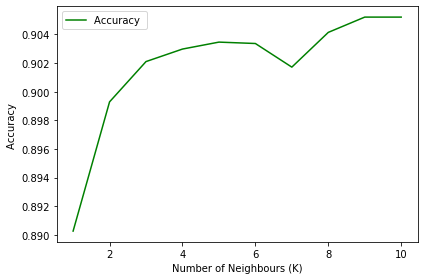

In [47]:
plt.plot(range(1,Ks+1),mean_acc,'g')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

## From above graph, its clear Best accuracy of this model is for k = 3 and lowest accuracy is for k =  2

Also, lowest accuarcy of this model is greater than logistic regression model for same data.

# 3). Decision Tree Algorithm

### First We import DecisionTreeClassifier model from tree Module

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtre=DecisionTreeClassifier(criterion='entropy',max_depth=7)

### Now we fit dtre model using train set

In [49]:
dtre.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Now dtre Model is ready.

### Predicting Vaues for test_x

In [50]:
dtpred_y=dtre.predict(test_x)

Comparing some values of Actual test y and predicted y.

In [51]:
dtcomp_df = pd.DataFrame({'Actual values':test_y,'Predicted values':dtpred_y})
dtcomp_df.head()

Actual values  Predicted values
0              1                 0
1              0                 0
2              0                 0
3              0                 0
4              0                 0

# Model Visualization

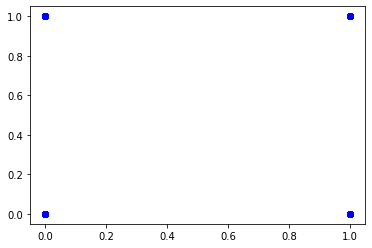

In [52]:
plt.plot(dtpred_y,test_y,'bo')
plt.show()

In [53]:
columns = model_data.columns[0:10].tolist()
columns
target_class = model_data['y'].tolist()
cl= []
for i in target_class:
    cl.append(str(i))
    

from sklearn.tree import plot_tree
plt.figure(figsize=(400,200))
plot_tree(dtre, filled=True, label='all' , feature_names= model_data.columns[0:7],class_names=cl)
plt.savefig('tree2', )

# Evaluation of dtre Model

Here, we evaluate the model using score functions, Classification Report and Confusion Matrix

In [54]:
dtre.score(test_x,test_y)

0.9115276294066232

In [55]:
dtcnf_matrix=confusion_matrix(test_y,dtpred_y)
dtcnf_matrix

array([[8785,  346],
       [ 565,  601]], dtype=int64)

In [56]:
dtas=metrics.accuracy_score(test_y,dtpred_y)
dtas

0.9115276294066232

In [57]:
print(classification_report(test_y,dtpred_y))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9131
           1       0.63      0.52      0.57      1166

    accuracy                           0.91     10297
   macro avg       0.79      0.74      0.76     10297
weighted avg       0.91      0.91      0.91     10297



# -> Decision tree using Id3Estimator

### First We import Id3Estimator model from id3 library

In [58]:
from id3 import Id3Estimator
estimator=Id3Estimator()

C:\Users\SS\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Now we fit using train set

In [59]:
idt=estimator.fit(train_x,train_y)

### Now idt Model is ready.

### Predicting Vaues for test_x

In [60]:
idtpred_y=idt.predict(test_x)

Comparing some values of Actual test y and predicted y.

In [61]:
idtcomp_df = pd.DataFrame({'Actual values':test_y,'Predicted values':idtpred_y})
idtcomp_df.head()

Actual values  Predicted values
0              1                 0
1              0                 0
2              0                 0
3              0                 0
4              0                 0

# Evaluation of idtre Model

Here, we evaluate the model using score functions, Classification Report and Confusion Matrix

In [62]:
idtcnf_matrix=confusion_matrix(test_y,idtpred_y)
idtcnf_matrix

array([[8921,  210],
       [ 784,  382]], dtype=int64)

In [63]:
idtas=metrics.accuracy_score(test_y,idtpred_y)
idtas

0.9034670292318151

In [64]:
print(classification_report(test_y,idtpred_y))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9131
           1       0.65      0.33      0.43      1166

    accuracy                           0.90     10297
   macro avg       0.78      0.65      0.69     10297
weighted avg       0.89      0.90      0.89     10297



## Clearly, From above Accuracy score of decision tree by DecisionTreeClassifier and by ID3 estimator are almost same.
But it is litle more than Logistic regression and very less than KNN Classification method.

# Accuracy Score Comaprision

In [65]:
Scores = pd.DataFrame([lras, mean_acc.max(), dtas, idtas], index=['Logistic Regression Model', 'KNN Model', 'Decision Tree Model using DecisionTreeClassifier','Decison Tree Model using ID3 Estimator'], 
             columns=['Error'])
Scores

Error
Logistic Regression Model                         0.903661
KNN Model                                         0.905215
Decision Tree Model using DecisionTreeClassifier  0.911528
Decison Tree Model using ID3 Estimator            0.903467